# Project Absenteeism 

As we appreciate that human capital plays an important role in collection, transportation and delivery.The company is facing genuine issue of Absenteeism. Lets help them by using Data Analytics and Machine Learning.

In [1]:
#Load few Libraries

import os
import pandas as pd
import numpy as np
import seaborn as sns

from fancyimpute import KNN

import matplotlib.pyplot as plt

import statistics
from sklearn.metrics import r2_score
from scipy import stats
from sklearn.model_selection import train_test_split,RandomizedSearchCV

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression


%matplotlib inline
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [2]:

#Set the Directory

os.chdir("F:/Data Science/Project Employee Absentism")
os.getcwd()

'F:\\Data Science\\Project Employee Absentism'

In [3]:
#Load the File

d=pd.read_excel('Absenteeism_at_work_Project.xlsx')

# Basic Data Exploring and Preprocessing

In [4]:
d.head(5)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


In [5]:
#Lets check info
d.info()

#Here we can see that there are multiple variables which contains Missing Values. Hence we have to treat missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
ID                                 740 non-null int64
Reason for absence                 737 non-null float64
Month of absence                   739 non-null float64
Day of the week                    740 non-null int64
Seasons                            740 non-null int64
Transportation expense             733 non-null float64
Distance from Residence to Work    737 non-null float64
Service time                       737 non-null float64
Age                                737 non-null float64
Work load Average/day              730 non-null float64
Hit target                         734 non-null float64
Disciplinary failure               734 non-null float64
Education                          730 non-null float64
Son                                734 non-null float64
Social drinker                     737 non-null float64
Social smoker                      736 non-null float64
Pet  

In [6]:
d.shape

(740, 21)

In [7]:
#Lets see Unique values present in each variable

d.nunique()

ID                                 36
Reason for absence                 28
Month of absence                   13
Day of the week                     5
Seasons                             4
Transportation expense             24
Distance from Residence to Work    25
Service time                       18
Age                                22
Work load Average/day              38
Hit target                         13
Disciplinary failure                2
Education                           4
Son                                 5
Social drinker                      2
Social smoker                       2
Pet                                 6
Weight                             26
Height                             14
Body mass index                    17
Absenteeism time in hours          19
dtype: int64

In [8]:
#Lets see Distributiom of our Data
d.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,737.000000,739.000000,740.000000,740.000000,733.000000,737.000000,737.000000,737.000000,730.000000,...,734.000000,730.000000,734.000000,737.000000,736.000000,738.000000,739.000000,726.000000,709.000000,718.000000
mean,18.017568,19.188602,6.319350,3.914865,2.544595,221.035471,29.667571,12.565807,36.449118,271188.860274,...,0.053134,1.295890,1.017711,0.567164,0.073370,0.746612,79.063599,172.152893,26.684062,6.977716
std,11.021247,8.437493,3.435948,1.421675,1.111831,66.954179,14.848124,4.389813,6.480148,38981.880873,...,0.224453,0.676965,1.094928,0.495805,0.260919,1.319726,12.868630,6.081065,4.292819,13.476962
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205917.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244387.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264249.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,284853.000000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378884.000000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [9]:
#There is a column named Work Load Avg/day. It will generate errors due to / sign. Hence we have to change the name.

d.columns=d.columns.str.replace('Work load Average/day ', "Work load Average per Day")

In [10]:
d.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average per Day', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [11]:
#Replace 0 with NA in Month of Absence
d['Month of absence']= d['Month of absence'].replace(0,np.nan)

In [12]:
#Remove variable ID as we are focusing on reason for absenteeism

d= d.drop(['ID'],axis=1)

In [13]:
# Work_load_Average/day_ by 1000 
d["Work load Average per Day"]=d["Work load Average per Day"].div(1000)

In [14]:
d['Work load Average per Day']

0      239.554
1      239.554
2      239.554
3      239.554
4      239.554
5      239.554
6      239.554
7      239.554
8      239.554
9      239.554
10     239.554
11     239.554
12     239.554
13     239.554
14     239.554
15     239.554
16     239.554
17     239.554
18     239.554
19     205.917
20     205.917
21     205.917
22     205.917
23     205.917
24     205.917
25     205.917
26     205.917
27     205.917
28     205.917
29     205.917
        ...   
710    275.089
711    275.089
712    275.089
713    275.089
714    275.089
715    275.089
716    275.089
717    275.089
718    275.089
719    275.089
720    275.089
721    275.089
722    275.089
723    275.089
724    275.089
725    264.604
726    264.604
727    264.604
728    264.604
729    264.604
730    264.604
731    264.604
732    264.604
733    264.604
734    264.604
735    264.604
736    264.604
737    271.219
738    271.219
739    271.219
Name: Work load Average per Day, Length: 740, dtype: float64

In [15]:
#Lets make a copy of data
df=d.copy()

In [16]:
df.dtypes

Reason for absence                 float64
Month of absence                   float64
Day of the week                      int64
Seasons                              int64
Transportation expense             float64
Distance from Residence to Work    float64
Service time                       float64
Age                                float64
Work load Average per Day          float64
Hit target                         float64
Disciplinary failure               float64
Education                          float64
Son                                float64
Social drinker                     float64
Social smoker                      float64
Pet                                float64
Weight                             float64
Height                             float64
Body mass index                    float64
Absenteeism time in hours          float64
dtype: object

In [17]:
df.columns=df.columns.str.replace(' ','')

In [18]:
#lets divide data into continuous and categorical
    
num=['Transportationexpense','DistancefromResidencetoWork','Servicetime','Age','WorkloadAverageperDay','Hittarget',
     'Weight','Height','Bodymassindex','Absenteeismtimeinhours']

cat=['Reasonforabsence','Monthofabsence','Dayoftheweek','Seasons','Disciplinaryfailure','Education','Son',
     'Socialdrinker','Socialsmoker','Pet']

In [19]:

df.dtypes

Reasonforabsence               float64
Monthofabsence                 float64
Dayoftheweek                     int64
Seasons                          int64
Transportationexpense          float64
DistancefromResidencetoWork    float64
Servicetime                    float64
Age                            float64
WorkloadAverageperDay          float64
Hittarget                      float64
Disciplinaryfailure            float64
Education                      float64
Son                            float64
Socialdrinker                  float64
Socialsmoker                   float64
Pet                            float64
Weight                         float64
Height                         float64
Bodymassindex                  float64
Absenteeismtimeinhours         float64
dtype: object

In [20]:
cat

['Reasonforabsence',
 'Monthofabsence',
 'Dayoftheweek',
 'Seasons',
 'Disciplinaryfailure',
 'Education',
 'Son',
 'Socialdrinker',
 'Socialsmoker',
 'Pet']

# Advanced Data-Preprocessing

# Missing Value Analysis

In [21]:
#Dropping data of Target Variable with Missing Values

df= df.drop(df[df['Absenteeismtimeinhours'].isnull()].index, axis=0)


In [22]:
df.shape

(718, 20)

As we can see data is reduced from 748 to 718

In [23]:
missing=pd.DataFrame(df.isnull().sum())

#Sort rows according in Decending Order of Missing Values

missing=missing.sort_values(0,ascending=False)

In [24]:
#lets change the names
missing=missing.reset_index()



In [25]:
missing=missing.rename(columns= {'index': 'Variable_Name', 0:'Missing_Values'})

In [26]:
#Convert into Percentage

missing['Missing_Values']=(missing['Missing_Values']/len(df)*100)



In [27]:
missing
#As we can see Body Mass Index have highest percentage of missing values


,Variable_Name,Missing_Values
0,Bodymassindex,4.038997
1,Height,1.949861
2,Education,1.392758
3,WorkloadAverageperDay,1.114206
4,Transportationexpense,0.835655
5,Son,0.835655
6,Hittarget,0.835655
7,Disciplinaryfailure,0.696379
8,Socialsmoker,0.557103
9,Monthofabsence,0.557103


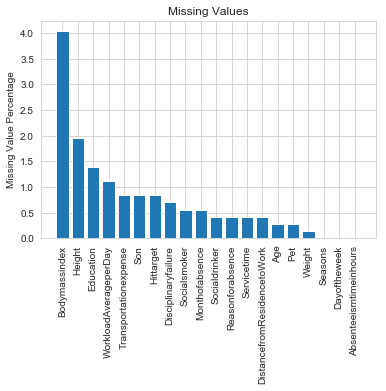

In [28]:
plt.bar(missing['Variable_Name'],missing['Missing_Values'])
plt.ylabel('Missing Value Percentage')
plt.title('Missing Values')
plt.xticks(rotation=90)
plt.savefig('missing_value.png')


In [29]:
#Save Output File

missing.to_csv("Missing_Percentage.csv",index=False)

In [30]:
#Imputing Missing Values for Categorical Variables
for i in cat:
    print(i)
    df[i] = df[i].fillna(df[i].mode()[0])
    print(df[i])

Reasonforabsence
0      26.0
1       0.0
2      23.0
3       7.0
4      23.0
6      22.0
7      23.0
8      19.0
9      22.0
10      1.0
11      1.0
12     11.0
13     11.0
14     23.0
16     23.0
17     21.0
18     11.0
19     23.0
21     11.0
22     13.0
23     28.0
24     18.0
25     25.0
26     23.0
27     28.0
28     18.0
29     23.0
30     18.0
31     18.0
32     23.0
       ... 
710    22.0
711    19.0
712    19.0
713    27.0
714     0.0
715     0.0
716    19.0
717    13.0
718    28.0
719    13.0
720    25.0
721    22.0
722     8.0
723    10.0
724    22.0
725    26.0
726    19.0
727     6.0
728    28.0
729     6.0
730    22.0
731    23.0
732    22.0
733    22.0
734    13.0
735    14.0
736    11.0
737     0.0
738     0.0
739     0.0
Name: Reasonforabsence, Length: 718, dtype: float64
Monthofabsence
0      7.0
1      7.0
2      7.0
3      7.0
4      7.0
6      7.0
7      7.0
8      7.0
9      7.0
10     7.0
11     7.0
12     7.0
13     7.0
14     7.0
16     7.0
17     7.0
18     7

In [31]:
(df[cat].isnull().sum())


Reasonforabsence       0
Monthofabsence         0
Dayoftheweek           0
Seasons                0
Disciplinaryfailure    0
Education              0
Son                    0
Socialdrinker          0
Socialsmoker           0
Pet                    0
dtype: int64

As we can see There are 0 missing values present now in Categorical Variables

In [32]:
#Impute Missing Values for Numerical Variables
#Original Value=30
#MEAN=26.68
#MEDIAN=25
#KNN=30 when K=3

df['Bodymassindex'].iloc[0]



30.0

In [33]:

#Empty that value
df['Bodymassindex'].iloc[0]=np.nan

In [34]:
#MEAN 

df['Bodymassindex']=df['Bodymassindex'].fillna(df['Bodymassindex'].mean())

In [35]:
df['Bodymassindex'].iloc[0]

26.70203488372093

In [36]:
#Median Method

df['Bodymassindex'].iloc[0]=np.nan


In [37]:

df['Bodymassindex']=df['Bodymassindex'].fillna(df['Bodymassindex'].median())



In [38]:
df['Bodymassindex'].iloc[0]

25.0

In [39]:
df['Bodymassindex'].iloc[0]=np.nan

In [40]:
#Lets use KNN Method

df=pd.DataFrame(KNN(k=3).fit_transform(df),columns=df.columns)

Imputing row 1/718 with 1 missing, elapsed time: 0.266
Imputing row 101/718 with 0 missing, elapsed time: 0.268
Imputing row 201/718 with 0 missing, elapsed time: 0.270
Imputing row 301/718 with 0 missing, elapsed time: 0.271
Imputing row 401/718 with 0 missing, elapsed time: 0.271
Imputing row 501/718 with 1 missing, elapsed time: 0.272
Imputing row 601/718 with 0 missing, elapsed time: 0.273
Imputing row 701/718 with 0 missing, elapsed time: 0.273


In [41]:
df['Bodymassindex'].iloc[0]

29.312543608329033

In [42]:
missing=pd.DataFrame(df.isnull().sum())

In [43]:
missing


,0
Reasonforabsence,0
Monthofabsence,0
Dayoftheweek,0
Seasons,0
Transportationexpense,0
DistancefromResidencetoWork,0
Servicetime,0
Age,0
WorkloadAverageperDay,0
Hittarget,0


#As we can see there are no missing values left now. We have  used MODE for Categorical Variables and KNN for Continuous Variables

In [44]:
#Verify

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718 entries, 0 to 717
Data columns (total 20 columns):
Reasonforabsence               718 non-null float64
Monthofabsence                 718 non-null float64
Dayoftheweek                   718 non-null float64
Seasons                        718 non-null float64
Transportationexpense          718 non-null float64
DistancefromResidencetoWork    718 non-null float64
Servicetime                    718 non-null float64
Age                            718 non-null float64
WorkloadAverageperDay          718 non-null float64
Hittarget                      718 non-null float64
Disciplinaryfailure            718 non-null float64
Education                      718 non-null float64
Son                            718 non-null float64
Socialdrinker                  718 non-null float64
Socialsmoker                   718 non-null float64
Pet                            718 non-null float64
Weight                         718 non-null float64
Height     

# Outliers Analysis

In [45]:
#Load Libraries

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib

Using matplotlib backend: TkAgg


In [46]:
%matplotlib inline

Transportationexpense


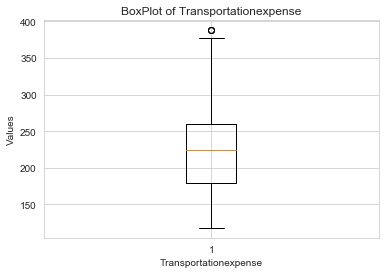

DistancefromResidencetoWork


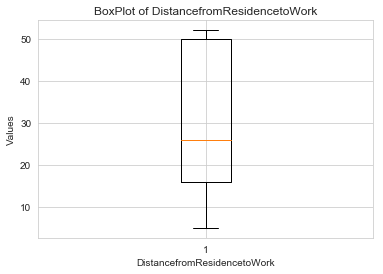

Servicetime


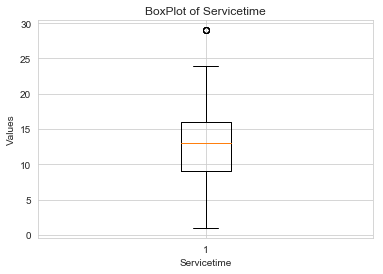

Age


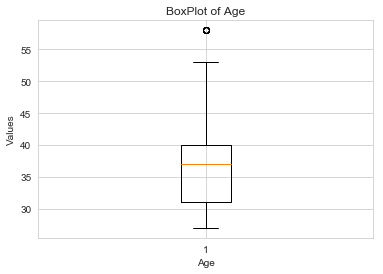

WorkloadAverageperDay


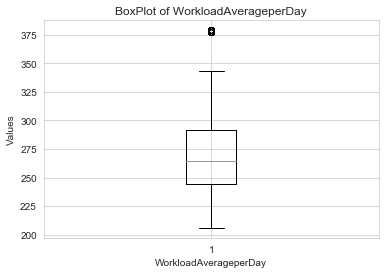

Hittarget


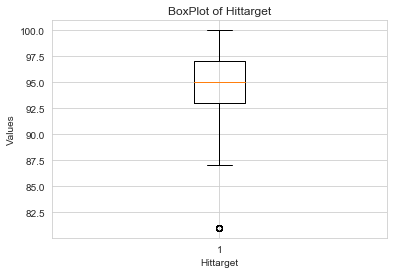

Weight


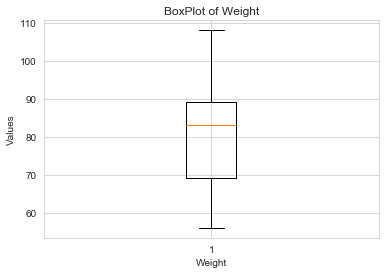

Height


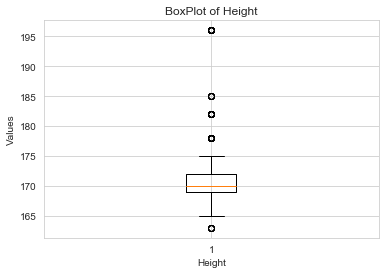

Bodymassindex


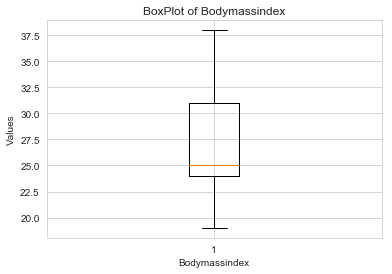

Absenteeismtimeinhours


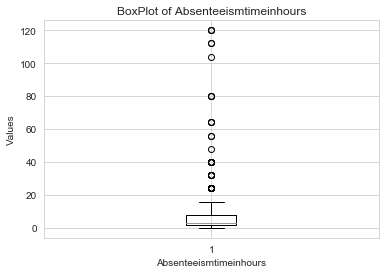

In [47]:
#Plot a Box Plot
for i in num:
    print(i)
    plt.boxplot(df[i])
    plt.xlabel(i)
    plt.ylabel('Values')
    plt.title("BoxPlot of "+i)
    plt.show()


In [48]:
#Now Remove all Outliers

for i in num:
    q75, q25 = np.percentile(df[i], [75,25]) 
    iqr = q75 - q25
    minimum = q25 - (iqr*1.5)
    maximum = q75 + (iqr*1.5)
    print(minimum)
    print(maximum)
    print(iqr)
    df.loc[df[i]< minimum,i] = np.nan
    df.loc[df[i]> maximum,i] = np.nan




57.5
381.5
81.0
-35.0
101.0
34.0
-1.5
26.5
7.0
17.5
53.5
9.0
173.15350000000004
363.1094999999999
47.488999999999976
87.0
103.0
4.0
39.0
119.0
20.0
164.5
176.5
3.0
13.5
41.5
7.0
-7.0
17.0
6.0


In [49]:
#Check if there is any missing value left

df.isnull().sum()

Reasonforabsence                 0
Monthofabsence                   0
Dayoftheweek                     0
Seasons                          0
Transportationexpense            3
DistancefromResidencetoWork      0
Servicetime                      5
Age                              8
WorkloadAverageperDay           29
Hittarget                       19
Disciplinaryfailure              0
Education                        0
Son                              0
Socialdrinker                    0
Socialsmoker                     0
Pet                              0
Weight                           0
Height                         114
Bodymassindex                    0
Absenteeismtimeinhours          43
dtype: int64

In [50]:

# Impute missing values with KNN
df = pd.DataFrame(KNN(k = 3).fit_transform(df), columns = df.columns)

Imputing row 1/718 with 0 missing, elapsed time: 0.200
Imputing row 101/718 with 0 missing, elapsed time: 0.201
Imputing row 201/718 with 1 missing, elapsed time: 0.203
Imputing row 301/718 with 0 missing, elapsed time: 0.207
Imputing row 401/718 with 0 missing, elapsed time: 0.209
Imputing row 501/718 with 0 missing, elapsed time: 0.211
Imputing row 601/718 with 2 missing, elapsed time: 0.213
Imputing row 701/718 with 0 missing, elapsed time: 0.215


In [51]:
df.shape

(718, 20)

We have Treated Outliers.

Methods Used- Boxplot and KNN

1.)We have used Boxplot for detecting outliers.
2.) After detecting Outliers we have replaced those values with NA and Treated with KNN Imputation method because as we have seen during imputation of Missing Values, KNN suited as the best Method.

# Feature Selection: Select only those variables which holds important information to explain Target variable

In [52]:
#Lets divide variables

num1=['Transportationexpense','DistancefromResidencetoWork','Servicetime','Age','WorkloadAverageperDay','Hittarget',
     'Weight','Height','Bodymassindex']


In [53]:
import matplotlib.pyplot as plt

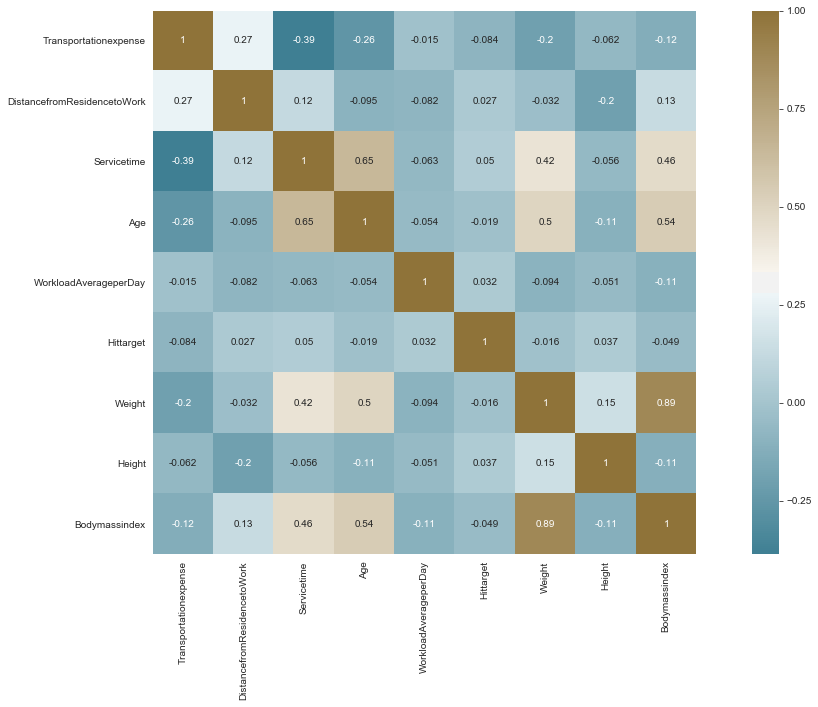

<Figure size 432x288 with 0 Axes>

In [54]:
#Build Correlation Plot
df_corr=df.loc[:,num1]
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(20, 10))

#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 60, as_cmap=True),
            square=True, ax=ax, annot = True)
plt.plot()
plt.show()
plt.savefig('Corrgram.png')

# Lets go for ANOVA

In [55]:
from statsmodels import *
from statsmodels.formula.api import ols
from scipy import *
from statsmodels.stats.anova import anova_lm


In [56]:
cat

['Reasonforabsence',
 'Monthofabsence',
 'Dayoftheweek',
 'Seasons',
 'Disciplinaryfailure',
 'Education',
 'Son',
 'Socialdrinker',
 'Socialsmoker',
 'Pet']

In [57]:
from scipy import stats

In [58]:
formula = 'Absenteeismtimeinhours ~ C(Seasons)+C(Monthofabsence)+C(Pet)+C(Son)+C(Socialdrinker)+C(Reasonforabsence)+C(Dayoftheweek)+C(Disciplinaryfailure)+C(Education)+C(Socialsmoker)  '

In [59]:
model = ols(formula, data=df).fit()


In [60]:
aov_table = anova_lm(model, typ=2)


In [61]:
aov_table

,sum_sq,df,F,PR(>F)
C(Seasons),29.136826,3.0,1.467306,2.222612e-01
C(Monthofabsence),89.113649,11.0,1.223915,2.668876e-01
C(Pet),67.374850,5.0,2.035764,7.180279e-02
C(Son),107.205099,4.0,4.049069,2.986933e-03
C(Socialdrinker),50.597576,1.0,7.644154,5.855476e-03
C(Reasonforabsence),2370.882402,27.0,13.266182,4.257894e-46
C(Dayoftheweek),14.815308,4.0,0.559565,6.921055e-01
C(Disciplinaryfailure),1.288425,1.0,0.194652,6.592178e-01
C(Education),36.688607,3.0,1.847607,1.372240e-01
C(Socialsmoker),1.195056,1.0,0.180546,6.710435e-01


In [62]:
#Remove Categorical Variables

df = df.drop(["Education","Seasons","Pet","Socialsmoker","Weight","Monthofabsence"],axis=1)


In [63]:
df.columns

Index(['Reasonforabsence', 'Dayoftheweek', 'Transportationexpense',
       'DistancefromResidencetoWork', 'Servicetime', 'Age',
       'WorkloadAverageperDay', 'Hittarget', 'Disciplinaryfailure', 'Son',
       'Socialdrinker', 'Height', 'Bodymassindex', 'Absenteeismtimeinhours'],
      dtype='object')

In [64]:
#Updated Variables

num_updated=['Transportationexpense','DistancefromResidencetoWork','Servicetime','Age','WorkloadAverageperDay','Hittarget',
     'Bodymassindex','Absenteeismtimeinhours','Height']

cat_updated=['Reasonforabsence','Dayoftheweek','Son','Disciplinaryfailure','Socialdrinker']

So we have completed Variable Selection.

Methods Used:

1.) Corrgram Plot- To detect Important Continuous Variables.
2.)ANOVA- To detect Important Categorical Variables

# Feature Engineering- We will bring data into a specific Range

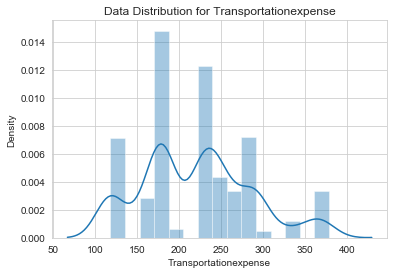

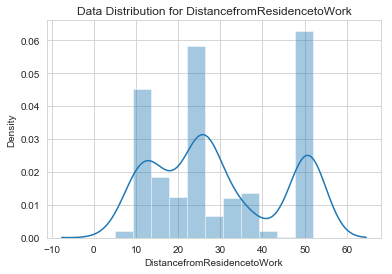

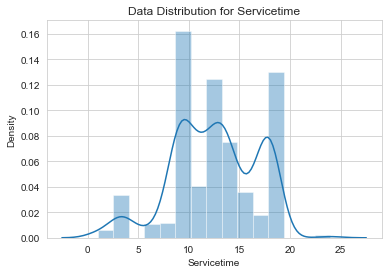

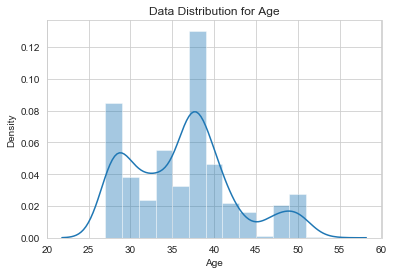

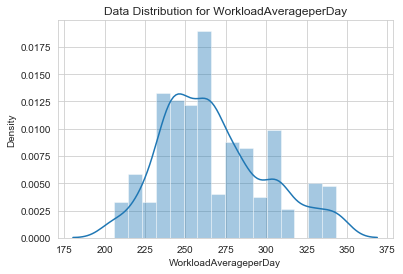

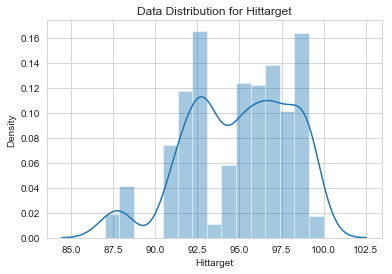

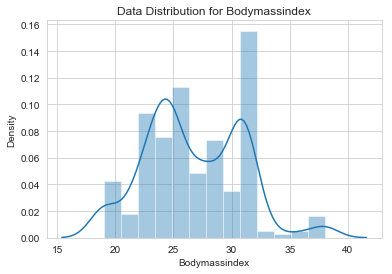

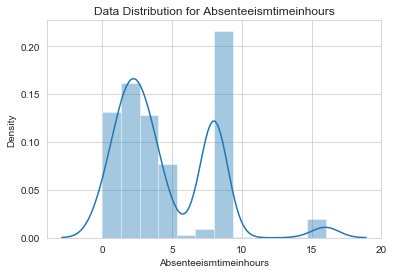

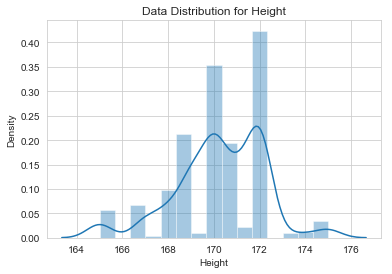

In [65]:
#First Check distribution of Data
for i in num_updated:
    if i == 'Absenteeism time in hours':
        continue
    sns.distplot(df[i],bins = 'auto')
    plt.title("Data Distribution for "+str(i))
    plt.ylabel("Density")
    plt.savefig('{i}_Vs_Density.png'.format(i=i))
    plt.show()

As we can see most of our data is not Normally Distributed. Hence we will go for Normalization!

In [66]:
#since skewness of target variable is high, apply log transform to reduce the skewness-
df['Absenteeismtimeinhours'] = np.log1p(df['Absenteeismtimeinhours'])

In [67]:
#Normalization
for i in num_updated:
    print(i)
    df[i] = (df[i] - min(df[i]))/(max(df[i]) - min(df[i]))

Transportationexpense
DistancefromResidencetoWork
Servicetime
Age
WorkloadAverageperDay
Hittarget
Bodymassindex
Absenteeismtimeinhours
Height


In [68]:
df.describe()

,Reasonforabsence,Dayoftheweek,Transportationexpense,DistancefromResidencetoWork,Servicetime,Age,WorkloadAverageperDay,Hittarget,Disciplinaryfailure,Son,Socialdrinker,Height,Bodymassindex,Absenteeismtimeinhours
count,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000
mean,19.409471,3.899721,0.392185,0.522314,0.498849,0.352281,0.446770,0.611770,0.045961,1.001393,0.565460,0.526500,0.405562,0.523387
std,8.279768,1.419519,0.251251,0.314352,0.180409,0.234607,0.235306,0.236843,0.209547,1.084311,0.496042,0.193729,0.221182,0.232330
min,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,3.000000,0.234615,0.234043,0.347826,0.153846,0.280116,0.461538,0.000000,0.000000,0.000000,0.400000,0.263158,0.387762
50%,23.000000,4.000000,0.411538,0.446809,0.521739,0.384615,0.424739,0.615385,0.000000,1.000000,1.000000,0.500000,0.315789,0.489301
75%,26.000000,5.000000,0.546154,0.957447,0.652174,0.500000,0.574766,0.769231,0.000000,2.000000,1.000000,0.699999,0.631579,0.775524
max,28.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718 entries, 0 to 717
Data columns (total 14 columns):
Reasonforabsence               718 non-null float64
Dayoftheweek                   718 non-null float64
Transportationexpense          718 non-null float64
DistancefromResidencetoWork    718 non-null float64
Servicetime                    718 non-null float64
Age                            718 non-null float64
WorkloadAverageperDay          718 non-null float64
Hittarget                      718 non-null float64
Disciplinaryfailure            718 non-null float64
Son                            718 non-null float64
Socialdrinker                  718 non-null float64
Height                         718 non-null float64
Bodymassindex                  718 non-null float64
Absenteeismtimeinhours         718 non-null float64
dtypes: float64(14)
memory usage: 78.6 KB


In [70]:
df.head(5)

,Reasonforabsence,Dayoftheweek,Transportationexpense,DistancefromResidencetoWork,Servicetime,Age,WorkloadAverageperDay,Hittarget,Disciplinaryfailure,Son,Socialdrinker,Height,Bodymassindex,Absenteeismtimeinhours
0,26.0,3.0,0.657692,0.659574,0.521739,0.230769,0.244925,0.769231,0.0,2.0,1.0,0.699999,0.542765,0.568061
1,0.0,3.0,0.000000,0.170213,0.739130,0.884615,0.244925,0.769231,1.0,1.0,1.0,0.699999,0.631579,0.000000
2,23.0,4.0,0.234615,0.978723,0.739130,0.423077,0.244925,0.769231,0.0,0.0,1.0,0.500000,0.631579,0.387762
3,7.0,5.0,0.619231,0.000000,0.565217,0.461538,0.244925,0.769231,0.0,2.0,1.0,0.300000,0.263158,0.568061
4,23.0,5.0,0.657692,0.659574,0.521739,0.230769,0.244925,0.769231,0.0,2.0,1.0,0.699999,0.578947,0.387762


In [71]:
df.to_csv("pre_processed.csv",index = False)


We have completed Feature Engineering/Feature Scaling.

Methods Used:

1.) Normalization- Because our data is not Normally Distributed. Had our data been Normally Distributed we would have gone for Standardization/Z-Score.

2.) Log- To normalize our Target Variable

In [72]:
#df.info()

In [73]:

#train.iloc[:,0:13]

In [74]:
df.head()

,Reasonforabsence,Dayoftheweek,Transportationexpense,DistancefromResidencetoWork,Servicetime,Age,WorkloadAverageperDay,Hittarget,Disciplinaryfailure,Son,Socialdrinker,Height,Bodymassindex,Absenteeismtimeinhours
0,26.0,3.0,0.657692,0.659574,0.521739,0.230769,0.244925,0.769231,0.0,2.0,1.0,0.699999,0.542765,0.568061
1,0.0,3.0,0.000000,0.170213,0.739130,0.884615,0.244925,0.769231,1.0,1.0,1.0,0.699999,0.631579,0.000000
2,23.0,4.0,0.234615,0.978723,0.739130,0.423077,0.244925,0.769231,0.0,0.0,1.0,0.500000,0.631579,0.387762
3,7.0,5.0,0.619231,0.000000,0.565217,0.461538,0.244925,0.769231,0.0,2.0,1.0,0.300000,0.263158,0.568061
4,23.0,5.0,0.657692,0.659574,0.521739,0.230769,0.244925,0.769231,0.0,2.0,1.0,0.699999,0.578947,0.387762


# Model with Dummies

In [75]:
#split data for predictor and target seperatly-

df = pd.get_dummies(df,columns=cat_updated)

X= df.drop(['Absenteeismtimeinhours'],axis=1)
Y= df['Absenteeismtimeinhours']

#Divide data into train and test-
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=.40)

# Decision Tree Regression

In [76]:
DT_Model = DecisionTreeRegressor(random_state = 1).fit(X_train,Y_train)


In [77]:
DT_Model

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [78]:
#Predict Test data by ignoring Target Variable
DT_predict = DT_Model.predict(X_test)


In [79]:
#Calculate Error Metrics

#RMSE

#Define function to calculate RMSE
def RMSE(actual,predicted):
    rmse = np.sqrt(mean_squared_error(actual,predicted))
    return rmse


In [80]:
#MAE

def MAE(actual,predicted):
    mae=mean_squared_error(actual,predicted)
    return mae

In [81]:
#MAE

MAE_DT=MAE(Y_test,DT_predict)

In [82]:
MAE_DT

0.04062172058198029

In [83]:
#RMSE

RMSE_DT=RMSE(Y_test,DT_predict)

In [84]:
RMSE_DT

0.20154830830840603

In [85]:
#R SQ

R2_DT=r2_score(Y_test,DT_predict)



In [86]:
print("Root Mean Square Rate for Linear Regression="+str(RMSE_DT))
print("Mean Absolute Error Rate for Linear Regression="+str(MAE_DT))
print("R2 Score for Linear Regression="+str(R2_DT))

Root Mean Square Rate for Linear Regression=0.20154830830840603
Mean Absolute Error Rate for Linear Regression=0.04062172058198029
R2 Score for Linear Regression=0.1603115033849788


# Random Forest

In [87]:
Rf_Model=RandomForestRegressor(n_estimators=300).fit(X_train,Y_train)

In [88]:
Rf_Model


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [89]:
#Predict Test Cases

Rf_Predict=Rf_Model.predict(X_test)

In [90]:
RMSE_RF=RMSE(Y_test,Rf_Predict)

In [91]:
RMSE_RF

0.15076529175369732

In [92]:
MAE_RF=MAE(Y_test,Rf_Predict)

In [93]:
MAE_RF

0.022730173197577475

In [94]:
R2_RF=r2_score(Y_test,Rf_Predict)


In [95]:
R2_RF

0.5301463186042517

In [96]:
print("Root Mean Square Rate for Random Forest="+str(RMSE_RF))
print("Mean Absolute Error Rate for Random Forest="+str(MAE_RF))
print("R2 Score for Random Forest="+str(R2_RF))


Root Mean Square Rate for Random Forest=0.15076529175369732
Mean Absolute Error Rate for Random Forest=0.022730173197577475
R2 Score for Random Forest=0.5301463186042517


# Linear Regression

In [97]:
import statsmodels.api as sm

In [98]:
LR_Model=sm.OLS(Y_train,X_train).fit()

In [99]:
LR_Model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Absenteeismtimeinhours   R-squared:                       0.605
Model:                                OLS   Adj. R-squared:                  0.562
Method:                     Least Squares   F-statistic:                     13.78
Date:                    Mon, 22 Apr 2019   Prob (F-statistic):           7.79e-55
Time:                            10:59:23   Log-Likelihood:                 204.14
No. Observations:                     430   AIC:                            -320.3
Df Residuals:                         386   BIC:                            -141.5
Df Model:                              43                                         
Covariance Type:                nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Transportationexpense           0.1097      0.050      2.201      0.028       0.012       0.208
DistancefromResidencetoWork    -0.0794      0.042     -1.874      0.062      -0.163       0.004
Servicetime                     0.1080      0.082      1.315      0.189      -0.053       0.270
Age                            -0.0975      0.055     -1.780      0.076      -0.205       0.010
WorkloadAverageperDay          -0.0332      0.035     -0.954      0.341      -0.102       0.035
Hittarget                       0.0455      0.036      1.275      0.203      -0.025       0.116
Height                         -0.0763      0.047     -1.617      0.107      -0.169       0.016
Bodymassindex                   0.0315      0.050      0.629      0.529      -0.067       0.130
Reasonforabsence_0.0           -0.6114      0.154     -3.963      0.000      -0.915      -0.308
Reasonforabsence_1.0            0.1431      0.051      2.822      0.005       0.043       0.243
Reasonforabsence_2.0           -0.0514      0.158     -0.326      0.745      -0.362       0.259
Reasonforabsence_3.0            0.1924      0.157      1.223      0.222      -0.117       0.502
Reasonforabsence_4.0           -0.2658      0.161     -1.655      0.099      -0.582       0.050
Reasonforabsence_5.0            0.0683      0.111      0.612      0.541      -0.151       0.287
Reasonforabsence_6.0            0.1252      0.071      1.752      0.080      -0.015       0.266
Reasonforabsence_7.0            0.0473      0.055      0.866      0.387      -0.060       0.155
Reasonforabsence_8.0            0.2178      0.111      1.957      0.051      -0.001       0.437
Reasonforabsence_9.0            0.2469      0.080      3.094      0.002       0.090       0.404
Reasonforabsence_10.0           0.1139      0.051      2.235      0.026       0.014       0.214
Reasonforabsence_11.0           0.0186      0.042      0.442      0.659      -0.064       0.101
Reasonforabsence_12.0          -0.0045      0.066     -0.068      0.946      -0.134       0.125
Reasonforabsence_13.0           0.0942      0.033      2.863      0.004       0.030       0.159
Reasonforabsence_14.0           0.0535      0.053      1.018      0.310      -0.050       0.157
Reasonforabsence_15.0           0.1471      0.112      1.313      0.190      -0.073       0.367
Reasonforabsence_16.0          -0.2030      0.093     -2.192      0.029      -0.385      -0.021
Reasonforabsence_17.0       -9.211e-17    1.1e-16     -0.840      0.401   -3.08e-16    1.23e-16
Reasonforabsence_18.0           0.1661      0.047      3.509      0.001       0.073       0.259
Reasonforabsence_19.0           0.1574      0.039      4.088      0.000       0.082       0.233
Reasonforabsence_21.0           0.0677      0.080      0.850   

In [100]:
#Predict Test Cases

LR_Predict=LR_Model.predict(X_test)

In [101]:
RMSE_LR=RMSE(Y_test,LR_Predict)

In [102]:
RMSE_LR

0.1533122096573017

In [103]:
MAE_LR=MAE(Y_test,LR_Predict)

In [104]:
MAE_LR

0.023504633630004428

In [105]:
R2_LR=r2_score(Y_test,LR_Predict)


In [106]:
R2_LR

0.5141375059080981

In [107]:
print("Root Mean Square Rate for Linear Regression="+str(RMSE_LR))
print("Mean Absolute Error Rate for Linear Regression="+str(MAE_LR))
print("R2 Score for Linear Regression="+str(R2_LR))


Root Mean Square Rate for Linear Regression=0.1533122096573017
Mean Absolute Error Rate for Linear Regression=0.023504633630004428
R2 Score for Linear Regression=0.5141375059080981


# Models without Dummies

In [108]:
#Uplaod

new=pd.read_csv('pre_processed.csv')

In [109]:
#Divide data
a= new.drop(['Absenteeismtimeinhours'],axis=1)
b= new['Absenteeismtimeinhours']

#Divide data into train and test-
a_train,a_test,b_train,b_test= train_test_split(a,b,test_size=.40)

In [110]:
#Decision Tree

DT_Model1 = DecisionTreeRegressor(random_state = 1).fit(a_train,b_train)
#Predict Test data by ignoring Target Variable
DT_predict1 = DT_Model1.predict(a_test)

MAE_DT1=MAE(b_test,DT_predict1)
RMSE_DT1=RMSE(b_test,DT_predict1)
R2_DT1=r2_score(b_test,DT_predict1)

print(RMSE_DT1,MAE_DT1,R2_DT1)

0.20764368377127648 0.043115899410105865 0.25813344864910537


In [111]:
#Random Forest

Rf_Model1=RandomForestRegressor(n_estimators=300).fit(a_train,b_train)
#Predict Test Cases

Rf_Predict1=Rf_Model1.predict(a_test)

MAE_RF1=MAE(b_test,Rf_Predict1)
RMSE_RF1=RMSE(b_test,Rf_Predict1)
R2_RF1=r2_score(b_test,Rf_Predict1)

print(RMSE_RF1,MAE_RF1,R2_RF1)

0.1657134899098801 0.027460960738111932 0.5274975468842853


In [112]:
#Linear Regression

LR_Model1=sm.OLS(b_train,a_train).fit()
#Predict Test Cases
LR_Predict1=LR_Model1.predict(a_test)


MAE_LR1=MAE(b_test,LR_Predict1)
RMSE_LR1=RMSE(b_test,LR_Predict1)
R2_LR1=r2_score(b_test,LR_Predict1)
print(RMSE_LR1,MAE_LR1,R2_LR1)

0.20351389225099156 0.04141790433914821 0.2873497183949921


In [113]:
LR_Model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Absenteeismtimeinhours   R-squared:                       0.886
Model:                                OLS   Adj. R-squared:                  0.882
Method:                     Least Squares   F-statistic:                     248.2
Date:                    Mon, 22 Apr 2019   Prob (F-statistic):          5.69e-187
Time:                            10:59:25   Log-Likelihood:                 91.610
No. Observations:                     430   AIC:                            -157.2
Df Residuals:                         417   BIC:                            -104.4
Df Model:                              13                                         
Covariance Type:                nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Reasonforabsence               -0.0056      0.001     -4.439      0.000      -0.008      -0.003
Dayoftheweek                    0.0084      0.007      1.221      0.223      -0.005       0.022
Transportationexpense           0.3045      0.047      6.487      0.000       0.212       0.397
DistancefromResidencetoWork     0.0114      0.039      0.292      0.770      -0.065       0.088
Servicetime                     0.3221      0.074      4.348      0.000       0.176       0.468
Age                            -0.1529      0.061     -2.502      0.013      -0.273      -0.033
WorkloadAverageperDay           0.1412      0.039      3.609      0.000       0.064       0.218
Hittarget                       0.1347      0.041      3.323      0.001       0.055       0.214
Disciplinaryfailure            -0.7077      0.061    -11.668      0.000      -0.827      -0.588
Son                             0.0369      0.011      3.409      0.001       0.016       0.058
Socialdrinker                  -0.0109      0.026     -0.425      0.671      -0.061       0.039
Height                          0.2640      0.048      5.481      0.000       0.169       0.359
Bodymassindex                   0.1768      0.057      3.076      0.002       0.064       0.290
==============================================================================
Omnibus:                        2.249   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.325   Jarque-Bera (JB):                2.157
Skew:                          -0.076   Prob(JB):                        0.340
Kurtosis:                       3.312   Cond. No.                         191.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [114]:
#Important Obs

#Adj Rsq value is 88 which is amazing.

# Performance Evaluation

In [185]:
print("Root Mean Square Rate for Decision Tree="+str(RMSE_DT))
print("Root Mean Square Rate for Decision Tree(Without Dummies)="+str(RMSE_DT1))

print("Mean Absolute Error Rate for Decision Tree="+str(MAE_DT))
print("Mean Absolute Error Rate for Decision Tree(Without Dummies)="+str(MAE_DT1))

print("R2 Score for Decision Tree="+str(R2_DT))
print("R2 Score for Decision Tree(Without Dummies)="+str(R2_DT1))

Root Mean Square Rate for Decision Tree=0.20154830830840603
Root Mean Square Rate for Decision Tree(Without Dummies)=0.20764368377127648
Mean Absolute Error Rate for Decision Tree=0.04062172058198029
Mean Absolute Error Rate for Decision Tree(Without Dummies)=0.043115899410105865
R2 Score for Decision Tree=0.1603115033849788
R2 Score for Decision Tree(Without Dummies)=0.25813344864910537


In [186]:
print("Root Mean Square Rate for Random Forest="+str(RMSE_RF))
print("Root Mean Square Rate for Random Forest(Without Dummies)="+str(RMSE_RF1))

print("Mean Absolute Error Rate for Random Forest="+str(MAE_RF))
print("Mean Absolute Error Rate for Random Forest(Without Dummies)="+str(MAE_RF1))


print("R2 Score for Random Forest="+str(R2_RF))
print("R2 Score for Random Forest(Without Dummies)="+str(R2_RF1))

Root Mean Square Rate for Random Forest=0.15076529175369732
Root Mean Square Rate for Random Forest(Without Dummies)=0.1657134899098801
Mean Absolute Error Rate for Random Forest=0.022730173197577475
Mean Absolute Error Rate for Random Forest(Without Dummies)=0.027460960738111932
R2 Score for Random Forest=0.5301463186042517
R2 Score for Random Forest(Without Dummies)=0.5274975468842853


In [117]:
print("Root Mean Square Rate for Linear Regression="+str(RMSE_LR))
print("Root Mean Square Rate for Linear Regression(Wihout Dummies)="+str(RMSE_LR1))

print("Mean Absolute Error Rate for Linear Regression="+str(MAE_LR))
print("Mean Absolute Error Rate for Linear Regression(Wihout Dummies)="+str(MAE_LR1))


print("R2 Score for Linear Regression="+str(R2_LR))
print("R2 Score for Linear Regression(Wihout Dummies)="+str(R2_LR1))

Root Mean Square Rate for Linear Regression=0.1533122096573017
Root Mean Square Rate for Linear Regression(Wihout Dummies)=0.20351389225099156
Mean Absolute Error Rate for Linear Regression=0.023504633630004428
Mean Absolute Error Rate for Linear Regression(Wihout Dummies)=0.04141790433914821
R2 Score for Linear Regression=0.5141375059080981
R2 Score for Linear Regression(Wihout Dummies)=0.2873497183949921


We have used 3 Models.

1.) Desision Tree
2.)Random Forest
3.) Linear Regression

# Ludwig-  An AI tool launched by UBER. 

I tried to use it on our data set. It has been used rarely by anyone in Jupyter Envt. There are few observations from my side. 

1.)The model can except Missing Values.

2.) Accuracy improves with Larger Data set.

3.) Model requires high time as compared to others to get loaded.


Feed-Forward:(Require help from experienced team of edWISOR)

1.) Need help to impement whole algo in Jupyter. As claimed by Uber sources. This is the algorithm which can do any task for you without coding/minimal coding. This algorithm can do Classification, Regression, Recommendation Engine, NLP, Sentiment Analysis and what not.

***ADVICE, Use it without dummies*******



In [118]:

from ludwig import LudwigModel



For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [130]:
new.columns=new.columns.str.replace('WorkloadAverage/day ', "WorkloadAverageperDay")
new.columns=new.columns.str.replace('Reasonforabsence', "ReasonAbsence")
new.columns=new.columns.str.replace('Monthofabsence', "MonthAbsence")

In [178]:
#Divide Data into Train and Test

train,test=train_test_split(new,test_size=0.3)
new.columns
test.iloc[:,:13]

,ReasonAbsence,Dayoftheweek,Transportationexpense,DistancefromResidencetoWork,Servicetime,Age,WorkloadAverageperDay,Hittarget,Disciplinaryfailure,Son,Socialdrinker,Height,Bodymassindex
319,10.0,4.0,0.546154,0.957447,0.434783,0.346154,0.568780,0.769231,0.0,4.0,1.0,0.300000,0.210526
207,0.0,4.0,0.423077,0.212766,0.347826,0.884615,0.668669,0.384615,1.0,0.0,0.0,0.699999,0.263158
469,25.0,2.0,0.234615,0.978723,0.739130,0.423077,0.319508,0.461538,0.0,0.0,1.0,0.500000,0.631579
86,28.0,2.0,0.500000,0.425532,0.565217,0.769231,0.731258,0.461538,0.0,2.0,0.0,0.000000,0.684211
152,13.0,4.0,0.546154,0.957447,0.434783,0.346154,1.000000,0.615385,0.0,4.0,1.0,0.300000,0.405370
458,26.0,2.0,0.450000,0.319149,0.521739,0.615385,0.177470,0.384615,0.0,1.0,1.0,0.200000,1.000000
632,13.0,2.0,0.411538,0.446809,0.347826,0.038462,0.293958,0.307692,0.0,1.0,0.0,0.400000,0.263158
678,27.0,6.0,0.234615,0.446809,0.347826,0.115385,0.231105,0.923077,0.0,0.0,0.0,0.599999,0.000000
323,23.0,5.0,0.234615,0.978723,0.739130,0.423077,0.568780,0.769231,0.0,0.0,1.0,0.500000,0.631579
361,27.0,4.0,0.234615,0.978723,0.739130,0.423077,0.334224,0.692308,0.0,0.0,1.0,0.500000,0.631579


In [173]:
model_definition = {
    'input_features':[
        {'name':'ReasonAbsence', 'type':'numerical'},
        {'name':'Height', 'type':'numerical'},
        {'name':'Dayoftheweek', 'type':'numerical'},
        {'name':'Bodymassindex', 'type':'numerical'},
        {'name':'Transportationexpense', 'type':'numerical'},
        {'name':'DistancefromResidencetoWork', 'type':'numerical'},
        {'name':'Hittarget', 'type':'numerical'},
        {'name':'Servicetime', 'type':'numerical'},
        {'name':'Socialdrinker', 'type':'numerical'},
        {'name':'Son', 'type':'numerical'},
        {'name':'Age', 'type':'numerical'},
        {'name':'WorkloadAverageperDay', 'type':'numerical'},
        {'name':'Disciplinaryfailure', 'type':'numerical'},
             ],
    'output_features': [
        {'name':  'Absenteeismtimeinhours', 'type': 'numerical'}
    ]
}                              


In [174]:
model = LudwigModel(model_definition)

In [175]:
model

In [176]:
train_stats = model.train(data_df=new)


In [177]:
train_stats


{'train': OrderedDict([('Absenteeismtimeinhours',
               OrderedDict([('loss',
                             [56.19022262543146,
                              53.40122561482988,
                              50.71711854351578,
                              48.1414840668146,
                              45.67649489182692,
                              43.32312276565582,
                              41.08114906928008,
                              38.94939980892505,
                              36.92592667498767,
                              35.0080816806891,
                              33.19274589342949,
                              31.476448375092456,
                              29.855510162413708,
                              28.326096754807693,
                              26.884339943910255,
                              25.526350815150394,
                              24.248309314133383,
                              23.046466172799555,
                          

In [179]:
predictions = model.predict(data_df=test.iloc[:,:13])


In [181]:
RMSE(test.iloc[:,13],predictions)

2.4934059617406765

In [182]:
MAE(test.iloc[:,13],predictions)

6.217073290043949

In [183]:
r2_score(test.iloc[:,13],predictions)

-101.30858120671893

In [184]:
model.close()

The scores obtained are not impressive however LUDWIG performs well on a larger set of data. I've used Ludwig for the first time. I also observed that Ludwig can also handle missing values.